In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-events-history-in-cosmetics-shop/2019-Nov.csv
/kaggle/input/ecommerce-events-history-in-cosmetics-shop/2020-Feb.csv
/kaggle/input/ecommerce-events-history-in-cosmetics-shop/2019-Oct.csv
/kaggle/input/ecommerce-events-history-in-cosmetics-shop/2019-Dec.csv
/kaggle/input/ecommerce-events-history-in-cosmetics-shop/2020-Jan.csv


In [2]:
import matplotlib.pyplot as plt
import squarify
import matplotlib.dates as dates
from datetime import datetime

%matplotlib inline

In [3]:
#2019년 11월 데이터 읽어오기
nov = pd.read_csv('/kaggle/input/ecommerce-events-history-in-cosmetics-shop/2019-Nov.csv')
nov.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


In [4]:
nov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635837 entries, 0 to 4635836
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 318.3+ MB


In [5]:
nov.shape

(4635837, 9)

In [6]:
nov.isna().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    4560089
brand            1986029
price                  0
user_id                0
user_session         813
dtype: int64

In [7]:
nov.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

In [8]:
nov.category_code.value_counts()

appliances.environment.vacuum             32029
stationery.cartrige                       13263
apparel.glove                             10802
furniture.living_room.cabinet              7205
accessories.bag                            5833
furniture.bathroom.bath                    4839
appliances.personal.hair_cutter             815
accessories.cosmetic_bag                    606
furniture.living_room.chair                 185
appliances.environment.air_conditioner      171
Name: category_code, dtype: int64

In [9]:
nov.shape

(4635837, 9)

In [10]:
(nov['category_code'].isna()).value_counts() #너무 category_code가 nan인게 많다...

True     4560089
False      75748
Name: category_code, dtype: int64

In [11]:
nov.groupby('category_code')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
category_code,,,,,,,,
accessories.bag,5833.0,44.805069,13.529207,0.00,33.33,41.43,53.33,76.19
accessories.cosmetic_bag,606.0,9.053845,7.926066,3.02,4.44,4.60,5.56,23.81
apparel.glove,10802.0,6.980182,2.220266,0.00,5.29,6.35,9.14,11.19
appliances.environment.air_conditioner,171.0,8.005848,4.485715,3.02,4.51,5.79,12.68,23.81
appliances.environment.vacuum,32029.0,48.000362,28.204351,0.00,24.44,48.41,68.10,102.38
appliances.personal.hair_cutter,815.0,53.891313,15.989580,18.25,46.02,55.56,57.14,90.48
furniture.bathroom.bath,4839.0,25.257669,22.988576,1.79,4.16,9.05,52.70,54.76
furniture.living_room.cabinet,7205.0,167.446415,98.078611,0.00,79.35,150.79,299.81,299.81
furniture.living_room.chair,185.0,127.062162,40.056931,93.33,93.33,93.33,177.78,177.78


In [12]:
nov.groupby(['category_code', 'brand'])['price'].describe()

count        mean  \
category_code                          brand                           
accessories.bag                        irisk         2.0   21.430000   
                                       vosev      1004.0   59.876534   
accessories.cosmetic_bag               irisk         6.0    3.020000   
                                       shik        141.0   23.396454   
apparel.glove                          irisk         4.0    4.000000   
                                       benovy     4145.0    6.849689   
                                       domix       298.0    0.940000   
                                       mavala      134.0    7.599552   
                                       naomi       160.0    9.042500   
                                       nitrile    1077.0    9.302312   
                                       nitrimax   1561.0    9.904939   
appliances.environment.air_conditioner cutrin       38.0   12.950789   
                                       estel        11.0   10.397273   
                                       farmavita    11.0   13.920909   
                                       kaaral        2.0    3.020000   
                                       kapous        3.0    5.790000   
                                       markell       3.0    3.250000   
                                       matrix        4.0   22.025000   
                                       nirvel       97.0    4.901134   
                                       ypsed         2.0    6.350000   
appliances.environment.vacuum          irisk      2057.0   25.365095   
                                       emil       4799.0   52.995607   
                                       jessnail   3536.0   32.217110   
                                       kosmekka     11.0   60.524545   
                                       max        7248.0   71.052936   
                                       polarus    7214.0   62.715664   
                                       runail     4011.0   25.519018   
appliances.personal.hair_cutter        jaguar      113.0   84.951150   
furniture.bathroom.bath                irisk      1802.0   49.443479   
                                       domix      1521.0    4.035595   
                                       runail      294.0   52.787823   
                                       entity       29.0    8.620000   
                                       farmona      79.0   22.511519   
                                       gehwol       77.0   16.212208   
                                       kinetics     68.0   15.610000   
                                       masura       10.0    9.445000   
                                       milv        158.0    4.482468   
                                       oniq          6.0    9.813333   
furniture.living_room.cabinet          irisk       408.0   94.208995   
                                       kosmekka   1429.0  143.773128   
                                       runail      955.0   81.639340   
stationery.cartrige                    runail      364.0    2.134753   
                                       depilflax  1820.0    2.968302   
                                       italwax    9379.0    2.041404   
                                       profepil    107.0    2.638785   
                                       yoko        369.0    2.503144   

                                                           std     min  \
category_code                          brand                             
accessories.bag                        irisk      3.365828e+00   19.05   
                                       vosev      4.174755e+00   53.29   
accessories.cosmetic_bag               irisk      0.000000e+00    3.02   
                                       shik       5.686766e-01   22.62   
apparel.glove                          irisk      4.200000e-01    3.37   
                                       benovy     1.525946e+00    5.10   
  

In [13]:
nov.value_counts('user_id')

user_id
527021202    11720
550388516     4181
500179293     3665
552908674     3375
467810091     2946
             ...  
567959095        1
567959105        1
567959279        1
567959313        1
579969854        1
Length: 368232, dtype: int64

In [14]:
(nov.groupby('user_id')['user_id'].count() == 1).value_counts()

False    197102
True     171130
Name: user_id, dtype: int64

In [15]:
user_count = nov.groupby('user_id')['user_id'].count()
user_count = user_count[user_count == 1]
zero = user_count.index.tolist()
nov2 = nov.query('user_id in @zero')
#단 11명만 접속후 곧바로 구입함.(pusrchase)
nov.query('user_id in @zero')['event_type'].value_counts()

view                167604
cart                  3378
remove_from_cart       137
purchase                11
Name: event_type, dtype: int64

In [16]:
nov2[nov2['event_type']=='purchase']

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
461537,2019-11-04 18:14:31 UTC,purchase,5866056,1487580011627020412,NaN,lsanic,25.24,231981700,a4fbc75f-7d79-40a6-82bc-b01fbf614bc6
1003301,2019-11-08 06:44:37 UTC,purchase,5859270,1487580013522845895,NaN,almea,47.46,555696662,d41d7cc4-c26d-4d5d-96f7-413638651e78
1604656,2019-11-12 15:33:14 UTC,purchase,5793266,1487580009118826513,NaN,NaN,15.71,551094713,b01ad3e2-4d46-48f3-8c22-8e37325687d1
1812162,2019-11-14 06:41:58 UTC,purchase,5759386,1783999072332415142,NaN,NaN,15.08,571320307,c5986218-ad3f-40a5-8a48-479222970eb8
2092435,2019-11-16 12:01:23 UTC,purchase,5892331,1487580013053083824,stationery.cartrige,profepil,2.70,545072176,7c4edc3e-d950-4520-9950-468b0b9a2fa6
3227123,2019-11-23 05:23:32 UTC,purchase,5877454,1487580006300255120,NaN,jessnail,37.63,485112731,5d9c7dda-d884-4856-b38d-089c0907d58a
3554687,2019-11-24 17:23:31 UTC,purchase,5677043,1487580008246412266,NaN,estel,12.92,461940229,97dd794e-775b-41d8-bcf0-eab70a6b07a8
3645414,2019-11-25 07:55:54 UTC,purchase,5697463,1783999067156644376,NaN,estel,12.14,497373755,e965bb11-6101-4fca-819f-e43f812c6892
3646245,2019-11-25 08:01:56 UTC,purchase,5677043,1487580008246412266,NaN,estel,13.33,467229414,c3d2bc52-c673-46e1-a8e0-8c3b777c366b
4080226,2019-11-28 08:22:10 UTC,purchase,5830271,1487580008288355308,NaN,ellips,16.51,578081768,ad6e93cb-9abc-414d-b90d-3e6ffb55e48e


### 유니크한 유저만 세기
몇 명의 customers가 site에 방문하였는가?

In [17]:
nov['user_id'].nunique()

368232

### Visitors Daily Trend

In [18]:
#유저별 event_time 알아보기
d = nov.loc[:, ['event_time', 'user_id']]
d.head()

,event_time,user_id
0,2019-11-01 00:00:02 UTC,562076640
1,2019-11-01 00:00:09 UTC,553329724
2,2019-11-01 00:00:10 UTC,556138645
3,2019-11-01 00:00:11 UTC,564506666
4,2019-11-01 00:00:24 UTC,553329724


In [19]:
#event_time의 연월일만 잘라내기
d['event_time'] = d['event_time'].apply(lambda s: str(s)[:10])
d.head()

,event_time,user_id
0,2019-11-01,562076640
1,2019-11-01,553329724
2,2019-11-01,556138645
3,2019-11-01,564506666
4,2019-11-01,553329724


In [20]:
#만일 중복 데이터가 있다면, 제거하고 event_time별로 그룹바이
#즉, event_time의 연월일별 이용한 유저는 몇 명이나 카운트되는가?
visitor_by_date = d.drop_duplicates().groupby(['event_time'])['user_id'].agg(['count']).sort_values(by=['event_time'], ascending=True)
visitor_by_date[:10]

,count
event_time,
2019-11-01,14880
2019-11-02,14614
2019-11-03,15530
2019-11-04,16209
2019-11-05,18545
2019-11-06,17724
2019-11-07,19587
2019-11-08,17845
2019-11-09,15695


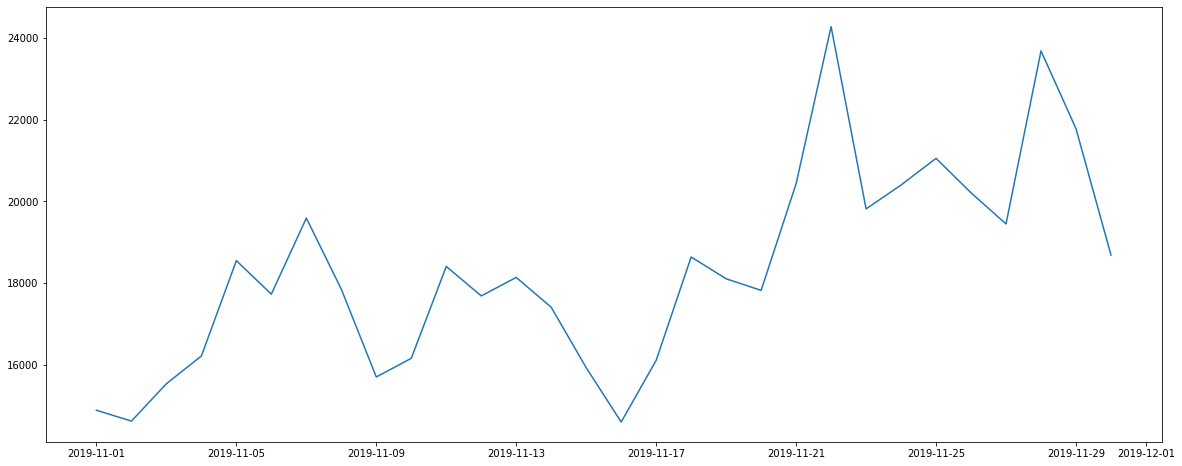

In [21]:
#위 결과를 그래프로 나타내보기!
x = pd.Series(visitor_by_date.index.values).apply(lambda s: datetime.strptime(s, '%Y-%m-%d').date())
y = visitor_by_date['count']
plt.rcParams['figure.figsize'] = (20,8)

plt.plot(x,y)
plt.show() #11월 말에 많은 듯?

### 카테고리로 알아보기
- 어떤 카테고리를 고객이 가장 많이 보았을까? 
- event_type pie 차트로 그리기

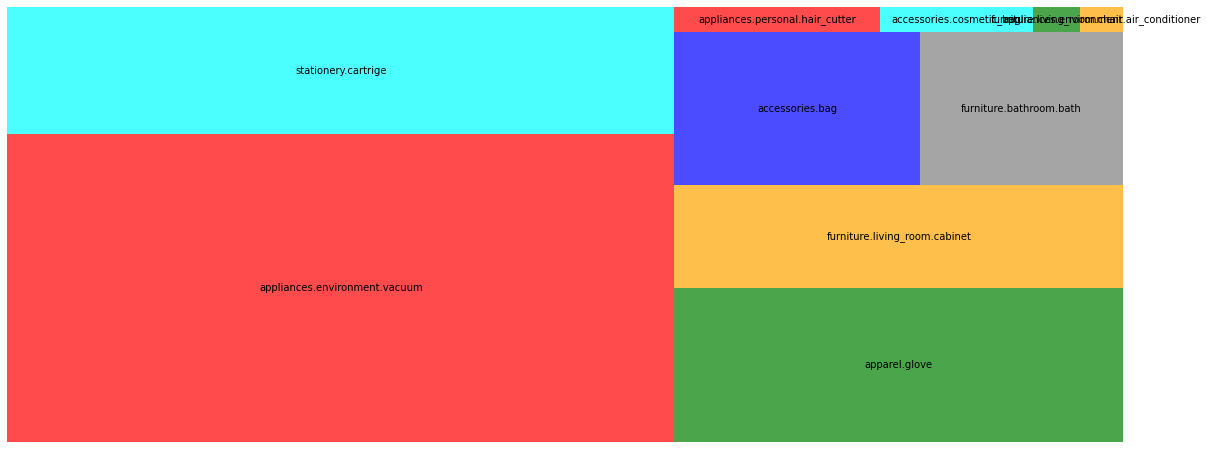

In [22]:
top_category_n = 30
top_category = nov.loc[:,'category_code'].value_counts()[:top_category_n].sort_values(ascending=False)
squarify.plot(sizes=top_category, label=top_category.index.array, color=["red","cyan","green","orange","blue","grey"], alpha=.7  )
plt.axis('off')
plt.show()

In [23]:
nov['event_type'].value_counts()

view                2076132
cart                1311807
remove_from_cart     925481
purchase             322417
Name: event_type, dtype: int64

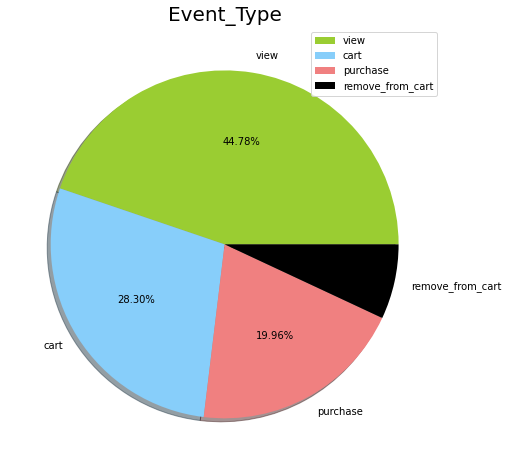

In [24]:
labels = ['view', 'cart','purchase','remove_from_cart']
size = nov['event_type'].value_counts()
colors = ['yellowgreen', 'lightskyblue','lightcoral', 'black']

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Event_Type', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

#### event_type이 'purchase'인 것의 item은 무엇일까?

In [25]:
purchase = nov.loc[nov['event_type'] == 'purchase']
purchase = purchase.dropna(axis='rows')
purchase.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
66,2019-11-01 00:04:33 UTC,purchase,5766980,1487580013053083824,stationery.cartrige,italwax,1.98,564451209,861ab2f1-b2e5-886f-a93b-5b067eff081f
67,2019-11-01 00:04:33 UTC,purchase,5767494,1487580013053083824,stationery.cartrige,italwax,2.14,564451209,861ab2f1-b2e5-886f-a93b-5b067eff081f
68,2019-11-01 00:04:33 UTC,purchase,5775813,1487580013053083824,stationery.cartrige,italwax,1.98,564451209,861ab2f1-b2e5-886f-a93b-5b067eff081f
69,2019-11-01 00:04:33 UTC,purchase,5775814,1487580013053083824,stationery.cartrige,italwax,1.98,564451209,861ab2f1-b2e5-886f-a93b-5b067eff081f
641,2019-11-01 00:46:37 UTC,purchase,5749199,1487580013053083824,stationery.cartrige,italwax,1.98,457604149,34adbc64-eebc-4d45-8542-547b9c20f6c1


In [26]:
purchase.groupby('category_code')['event_type'].agg(['count']).sort_values(by = 'count', ascending=False)

,count
category_code,
stationery.cartrige,1407
apparel.glove,759
appliances.environment.vacuum,728
furniture.bathroom.bath,223
furniture.living_room.cabinet,19
appliances.environment.air_conditioner,14
accessories.bag,5
accessories.cosmetic_bag,4


In [27]:
view = nov.loc[nov['event_type'] == 'view']
view = view.dropna(axis='rows')
view.groupby('category_code')['event_type'].agg(['count']).sort_values(by = 'count', ascending=False)

,count
category_code,
appliances.environment.vacuum,22576
stationery.cartrige,3834
apparel.glove,2766
furniture.living_room.cabinet,2543
furniture.bathroom.bath,2440
accessories.bag,940
accessories.cosmetic_bag,123
appliances.personal.hair_cutter,106
appliances.environment.air_conditioner,100


#### 소비자들은 어떤 브랜드를 많이 구매했을까?

In [28]:
top_sellers = purchase.groupby('brand')['brand'].agg(['count']).sort_values('count', ascending=False)
top_sellers.head(20)

,count
brand,
italwax,1080
benovy,465
depilflax,219
polarus,212
domix,167
max,154
runail,154
irisk,144
emil,133


# Modeling: predict at time of addition to shopping cart if user will purchase a given product or not
### Feature engineering

Restructure the data to feed into the machine learning model. For this use case, I only target the data which customers have "put" the product in the cart.

Furthermore, I add some new features into the training data set:

- category_code_level1: category
- category_code_level2: sub-category
- event_weekday: weekday of the event
- activity_count: number of activity in that session
- is_purchased: whether the put in cart item is purchased(event_type이 'purchase'이면 1, 아니면 0)

Thus, the training data set contains every non-duplicated cart transaction (within the same session, I only keep one record for a particular product in the cart) with above mentioned new feature. I will use those features, including the original price and brand to predict whether customers will eventually purchase the item in the cart.

In [29]:
df = nov.copy()

In [30]:
df_targets = df.loc[df["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['event_type', 'product_id','price', 'user_id','user_session'])
df_targets["is_purchased"] = np.where(df_targets["event_type"]=="purchase",1,0)
df_targets["is_purchased"] = df_targets.groupby(["user_session","product_id"])["is_purchased"].transform("max")
df_targets = df_targets.loc[df_targets["event_type"]=="cart"].drop_duplicates(["user_session","product_id","is_purchased"])
df_targets['event_weekday'] = df_targets['event_time'].apply(lambda s: str(datetime.strptime(str(s)[0:10], "%Y-%m-%d").weekday()))
df_targets.dropna(how='any', inplace=True)
df_targets["category_code_level1"] = df_targets["category_code"].str.split(".",expand=True)[0].astype('category')
df_targets["category_code_level2"] = df_targets["category_code"].str.split(".",expand=True)[1].astype('category')

In [31]:
#새로 생긴 컬럼: is_purchased, event_weekday, category_level 1,2
df_targets.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,is_purchased,event_weekday,category_code_level1,category_code_level2
376,2019-11-01 00:29:32 UTC,cart,5749199,1487580013053083824,stationery.cartrige,italwax,1.98,457604149,34adbc64-eebc-4d45-8542-547b9c20f6c1,1.0,4,stationery,cartrige
382,2019-11-01 00:29:59 UTC,cart,5775814,1487580013053083824,stationery.cartrige,italwax,1.98,457604149,34adbc64-eebc-4d45-8542-547b9c20f6c1,1.0,4,stationery,cartrige
389,2019-11-01 00:30:24 UTC,cart,5788783,1487580013053083824,stationery.cartrige,italwax,1.98,457604149,34adbc64-eebc-4d45-8542-547b9c20f6c1,1.0,4,stationery,cartrige
397,2019-11-01 00:30:49 UTC,cart,5855510,1487580006350586771,appliances.environment.vacuum,max,95.08,513114494,4d9cd992-d34d-4dc4-abe8-0f941ae1fa97,0.0,4,appliances,environment
446,2019-11-01 00:34:01 UTC,cart,5885590,1487580006350586771,appliances.environment.vacuum,polarus,78.57,566283723,b023f80f-362b-43fe-a3b0-d32279f42a82,0.0,4,appliances,environment


In [32]:
cart_purchase_users = df.loc[df["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['user_id'])
cart_purchase_users.dropna(how='any', inplace=True)
cart_purchase_users_all_activity = df.loc[df['user_id'].isin(cart_purchase_users['user_id'])]

In [33]:
cart_purchase_users_all_activity.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
252,2019-11-01 00:18:27 UTC,view,5743974,1487580013053083824,stationery.cartrige,italwax,1.98,370706182,6223f8f8-7eb1-498a-b35e-8292ea3c7b9e
365,2019-11-01 00:28:53 UTC,view,5657900,1487580013053083824,stationery.cartrige,NaN,2.06,457604149,34adbc64-eebc-4d45-8542-547b9c20f6c1
376,2019-11-01 00:29:32 UTC,cart,5749199,1487580013053083824,stationery.cartrige,italwax,1.98,457604149,34adbc64-eebc-4d45-8542-547b9c20f6c1
382,2019-11-01 00:29:59 UTC,cart,5775814,1487580013053083824,stationery.cartrige,italwax,1.98,457604149,34adbc64-eebc-4d45-8542-547b9c20f6c1
387,2019-11-01 00:30:07 UTC,view,5885590,1487580006350586771,appliances.environment.vacuum,polarus,78.57,566283723,b023f80f-362b-43fe-a3b0-d32279f42a82


#### session 안의 activity를 카운트하기 위한 df 생성

In [34]:
activity_in_session = cart_purchase_users_all_activity.groupby(['user_session'])['event_type'].count().reset_index()
activity_in_session = activity_in_session.rename(columns={"event_type": "activity_count"})
activity_in_session

,user_session,activity_count
0,0014f534-f34d-47b9-9720-363d184b21b9,1
1,0036d3ff-652f-4cc7-b1f0-b7d23ecfc092,4
2,003c1d09-749a-44b2-b0af-9c82c9a11182,70
3,0043a9c0-6a69-4a8e-bad0-e065c2797118,1
4,0048da97-22ea-4d7b-a2c2-4a376f754a51,1
...,...,...
6861,ffe1f40e-242a-4a39-926b-e5df4321bf61,1
6862,ffe2ee5c-2b63-46f8-b7bd-090e9f0b4966,3
6863,ffe84b00-701e-4501-8e07-f7e41c44600c,11
6864,fff32e24-e6c9-4aca-a600-ba16c33c5c45,18


In [35]:
del d # free memory

In [36]:
#위에서 만든 'activity_count' 열을 새로운 컬럼으로 생성 
df_targets = df_targets.merge(activity_in_session, on='user_session', how='left')
df_targets['activity_count'] = df_targets['activity_count'].fillna(0)
df_targets.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,is_purchased,event_weekday,category_code_level1,category_code_level2,activity_count
0,2019-11-01 00:29:32 UTC,cart,5749199,1487580013053083824,stationery.cartrige,italwax,1.98,457604149,34adbc64-eebc-4d45-8542-547b9c20f6c1,1.0,4,stationery,cartrige,17.0
1,2019-11-01 00:29:59 UTC,cart,5775814,1487580013053083824,stationery.cartrige,italwax,1.98,457604149,34adbc64-eebc-4d45-8542-547b9c20f6c1,1.0,4,stationery,cartrige,17.0
2,2019-11-01 00:30:24 UTC,cart,5788783,1487580013053083824,stationery.cartrige,italwax,1.98,457604149,34adbc64-eebc-4d45-8542-547b9c20f6c1,1.0,4,stationery,cartrige,17.0
3,2019-11-01 00:30:49 UTC,cart,5855510,1487580006350586771,appliances.environment.vacuum,max,95.08,513114494,4d9cd992-d34d-4dc4-abe8-0f941ae1fa97,0.0,4,appliances,environment,0.0
4,2019-11-01 00:34:01 UTC,cart,5885590,1487580006350586771,appliances.environment.vacuum,polarus,78.57,566283723,b023f80f-362b-43fe-a3b0-d32279f42a82,0.0,4,appliances,environment,5.0


### 본격 모델링

In [37]:
#미리 저장해두기
df_targets.to_csv('training_data.csv')

In [38]:
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   event_time            8763 non-null   object  
 1   event_type            8763 non-null   object  
 2   product_id            8763 non-null   int64   
 3   category_id           8763 non-null   int64   
 4   category_code         8763 non-null   object  
 5   brand                 8763 non-null   object  
 6   price                 8763 non-null   float64 
 7   user_id               8763 non-null   int64   
 8   user_session          8763 non-null   object  
 9   is_purchased          8763 non-null   float64 
 10  event_weekday         8763 non-null   object  
 11  category_code_level1  8763 non-null   category
 12  category_code_level2  8763 non-null   category
 13  activity_count        8763 non-null   float64 
dtypes: category(2), float64(3), int64(3), object(6)
memory u

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from sklearn.utils import resample
from sklearn import metrics

### Resampling training set

In [40]:
#타겟인 is_purchased만 떼어내기 
is_purcahase_set = df_targets[df_targets['is_purchased']== 1]
is_purcahase_set.shape[0] #is_purchased=1인 것은 1622개

1622

In [41]:
not_purcahase_set = df_targets[df_targets['is_purchased']== 0]
not_purcahase_set.shape[0] #반대로 is_purchased=0은 7141개

7141

In [42]:
## train set 리샘플링 
#본 데이터가(구매만 뽑은거) 만개가 안넘지만, 좀더 데이터를 많이 만들고자 5만개로 늘림.
#그래서 replace=True로 생성 
n_samples = 50000
is_purchase_downsampled = resample(is_purcahase_set,
                                replace = True, 
                                n_samples = n_samples,
                                random_state = 27)
not_purcahase_set_downsampled = resample(not_purcahase_set,
                                replace = True,
                                n_samples = n_samples,
                                random_state = 27)

In [43]:
#만든것들 붙이기 
downsampled = pd.concat([is_purchase_downsampled, not_purcahase_set_downsampled])
downsampled['is_purchased'].value_counts()

0.0    50000
1.0    50000
Name: is_purchased, dtype: int64

In [44]:
features = downsampled.loc[:,['brand', 'price', 'event_weekday', 'category_code_level1', 'category_code_level2', 'activity_count']]
features.head()

,brand,price,event_weekday,category_code_level1,category_code_level2,activity_count
5684,italwax,1.78,4,stationery,cartrige,43.0
2833,benovy,5.57,1,apparel,glove,0.0
4017,gehwol,16.67,5,furniture,bathroom,0.0
7019,italwax,1.98,0,stationery,cartrige,0.0
5704,benovy,5.22,4,apparel,glove,0.0


이제 downsampled의 'is_purchased'가 타겟, 그리고 따로 떼어낸 'features'를 피처로 사용할 것!

In [45]:
## features의 범주형 변수 변경 
features.loc[:,'brand'] = LabelEncoder().fit_transform(downsampled.loc[:,'brand'].copy())
features.loc[:,'event_weekday'] = LabelEncoder().fit_transform(downsampled.loc[:,'event_weekday'].copy())
features.loc[:,'category_code_level1'] = LabelEncoder().fit_transform(downsampled.loc[:,'category_code_level1'].copy())
features.loc[:,'category_code_level2'] = LabelEncoder().fit_transform(downsampled.loc[:,'category_code_level2'].copy())

is_purchased = LabelEncoder().fit_transform(downsampled['is_purchased'])
features.head()

,brand,price,event_weekday,category_code_level1,category_code_level2,activity_count
5684,9,1.78,4,4,2,43.0
2833,0,5.57,1,1,5,0.0
4017,7,16.67,5,3,1,0.0
7019,9,1.98,0,4,2,0.0
5704,0,5.22,4,1,5,0.0


In [46]:
print(list(features.columns))

['brand', 'price', 'event_weekday', 'category_code_level1', 'category_code_level2', 'activity_count']


### Split the data

In [47]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    is_purchased, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

### Model Training

In [48]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:18:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [49]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("fbeta:",metrics.fbeta_score(y_test, y_pred, average='weighted', beta=0.5))

Accuracy: 0.7025333333333333
Precision: 0.6688293370944993
Recall: 0.7951572875444363
fbeta: 0.7045960533115201


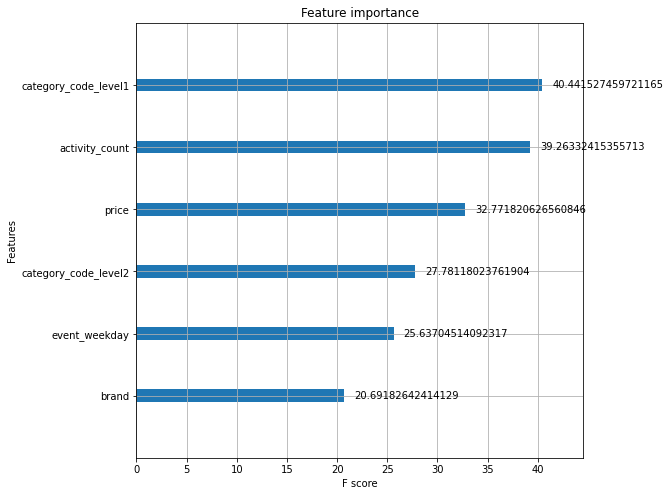

In [50]:
plot_importance(model, max_num_features=10, importance_type ='gain')
plt.rcParams['figure.figsize'] = (40,10)
plt.show()